Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Dataset for Problem 2: Holiday_Package.csv

Data Dictionary:

Variable Name	Description
Holiday_Package 	 Opted for Holiday Package yes/no?
Salary 	 Employee salary
age 	 Age in years
edu 	 Years of formal education
no_young_children 	 The number of young children (younger than 7 years)
no_older_children 	 Number of older children
foreign 	 foreigner Yes/No

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix




**Read the data**

In [325]:
data_df = pd.read_csv('Holiday_Package.csv')
data_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


**Get the info**

In [281]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


**Get the Summary Statistics**

In [282]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872,NaN,NaN,NaN,436.5,251.869,1,218.75,436.5,654.25,872
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check for Null Values**

In [283]:
data_df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

**Since Unnamed column is not required, we would drop this column for now**

In [326]:
data_df=data_df.drop(['Unnamed: 0'],axis=1)
data_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


**Check for Duplicates**

In [285]:
data_df.duplicated().sum()

0

**Check for Object Data Type**

In [58]:
data_df.select_dtypes(include='object').head()

,Holliday_Package,foreign
0,no,no
1,yes,no
2,no,no
3,no,no
4,no,no


In [286]:
data_df.shape

(872, 7)

In [60]:
data_df.isin([0]).sum()

Holliday_Package       0
Salary                 0
age                    0
educ                   0
no_young_children    665
no_older_children    393
foreign                0
dtype: int64

In [61]:
cs0 = pd.crosstab(data_df['Holliday_Package'],
                       data_df['no_young_children'],
                       margins=True)
cs0

no_young_children,0,1,2,3,All
Holliday_Package,,,,,
no,326,100,42,3,471
yes,339,47,13,2,401
All,665,147,55,5,872


Text(0, 0.5, 'Holliday_Package')

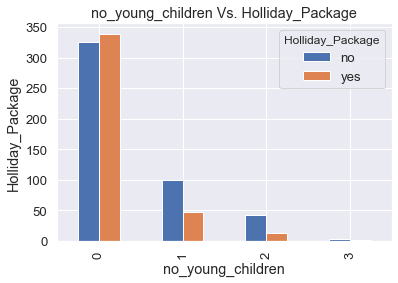

In [62]:
#fig.set_size_inches(60,40)
pd.crosstab(data_df.no_young_children,data_df.Holliday_Package).plot(kind='bar')
plt.title('no_young_children Vs. Holliday_Package')
plt.xlabel('no_young_children')
plt.ylabel('Holliday_Package')

In [63]:
cs1 = pd.crosstab(data_df['Holliday_Package'],
                       data_df['no_older_children'],
                       margins=True)
cs1

no_older_children,0,1,2,3,4,5,6,All
Holliday_Package,,,,,,,,
no,231,102,102,27,7,2,0,471
yes,162,96,106,28,7,0,2,401
All,393,198,208,55,14,2,2,872


Text(0, 0.5, 'Holliday_Package')

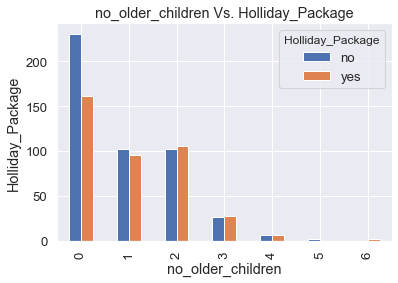

In [327]:
pd.crosstab(data_df.no_older_children,data_df.Holliday_Package).plot(kind='bar')
plt.title('no_older_children Vs. Holliday_Package')
plt.xlabel('no_older_children')
plt.ylabel('Holliday_Package')

**The value 0 present in the dataset is meaningful**

**Univariate Analysis**

C:\Users\RemotePC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


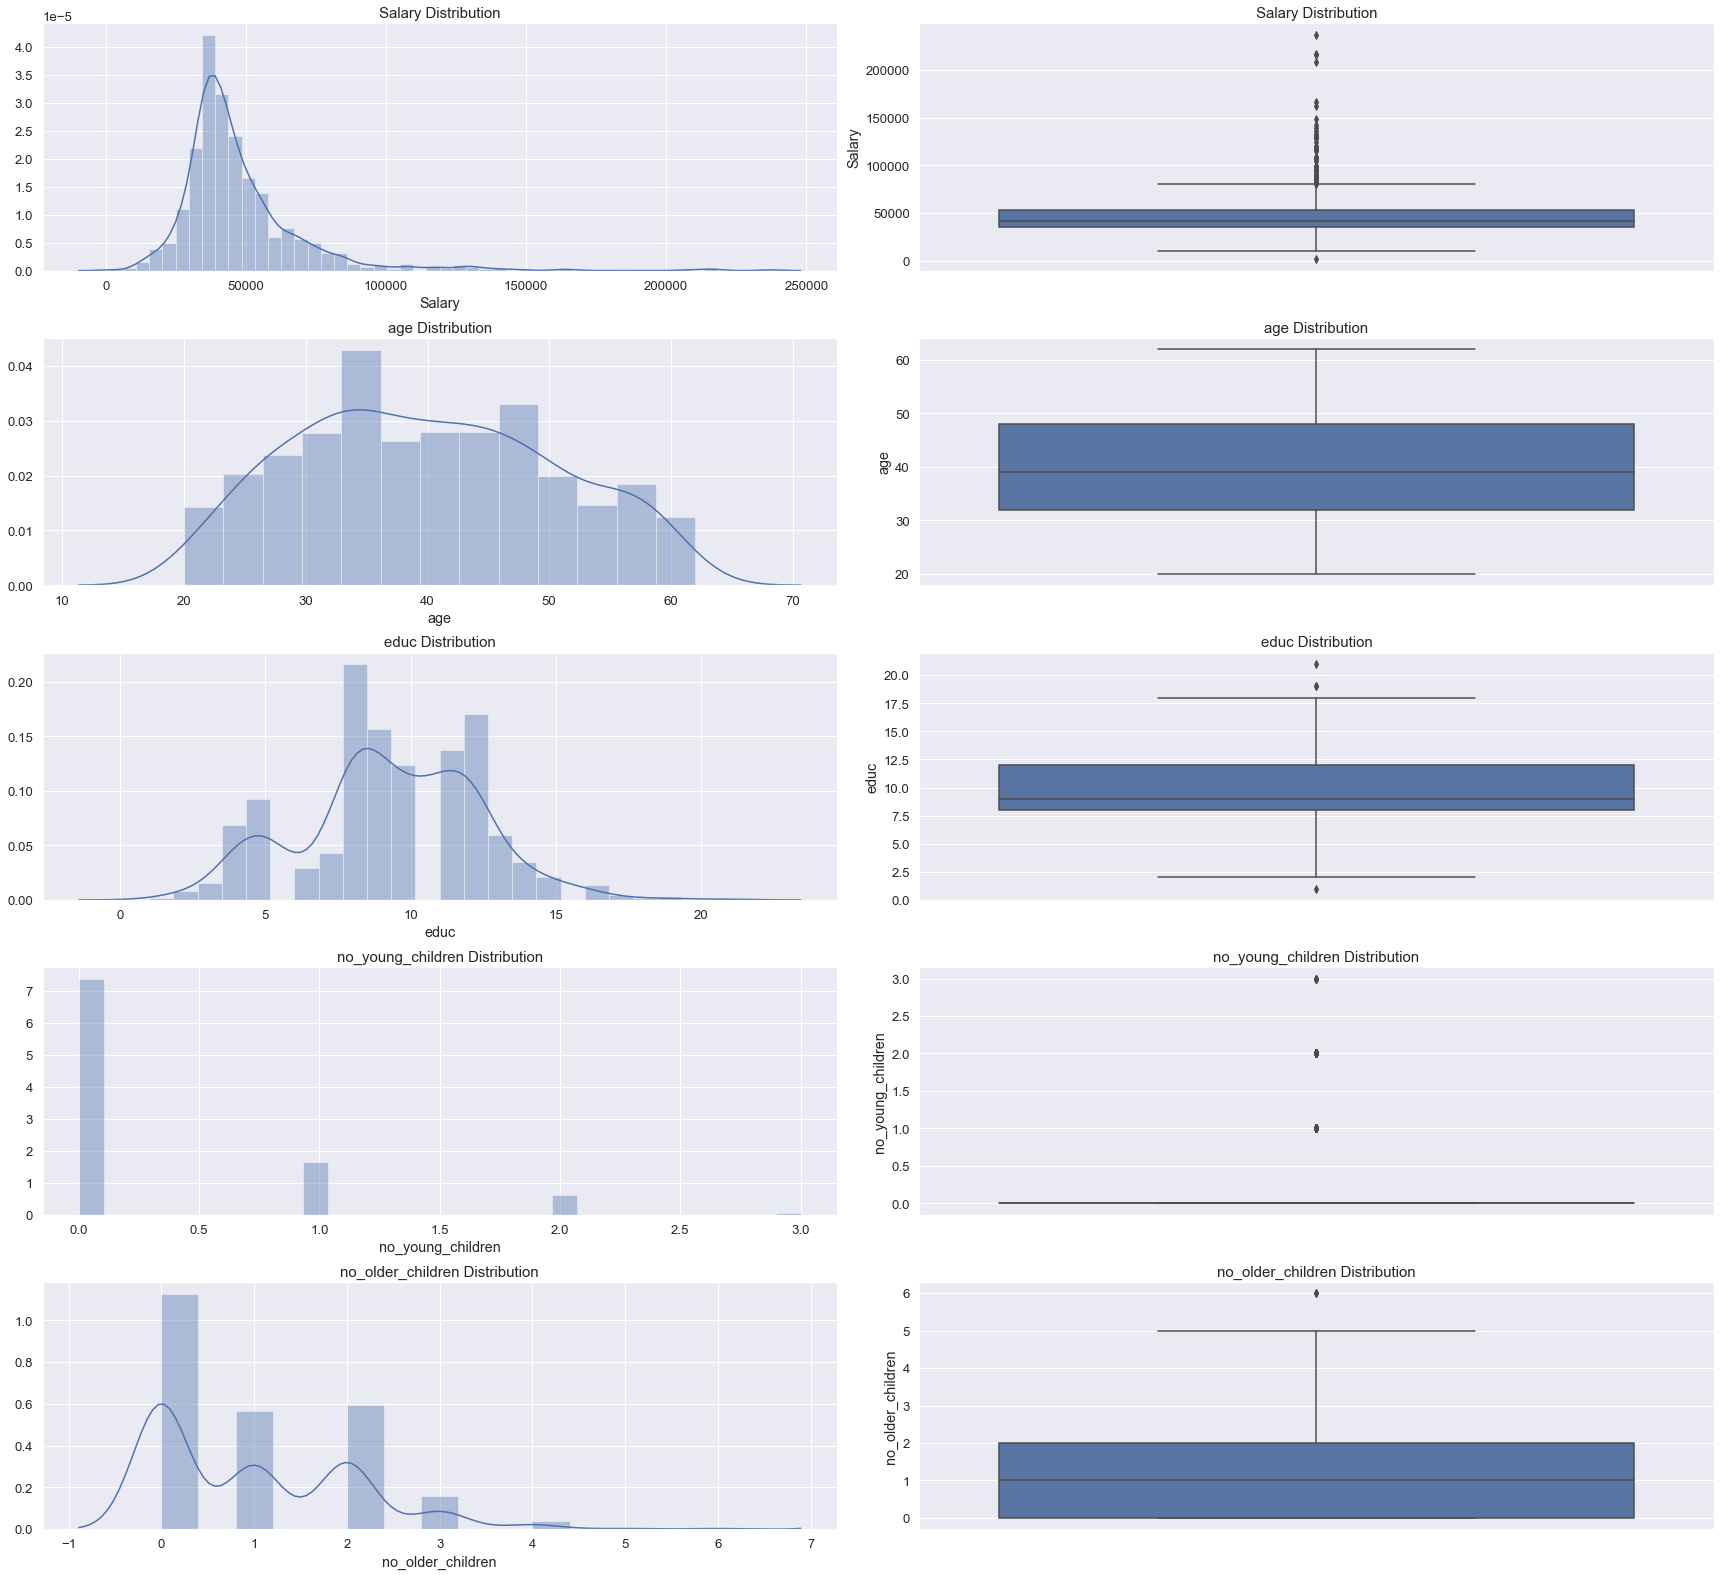

In [287]:
## Univariate except names column
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(24, 22)
a = sns.distplot(data_df['Salary'] , ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=15)
a = sns.boxplot(data_df['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(data_df['age'] , ax=axes[1][0])
a.set_title("age Distribution",fontsize=15)

a = sns.boxplot(data_df['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=15)

a = sns.distplot(data_df['educ'] , ax=axes[2][0])
a.set_title("educ Distribution",fontsize=15)

a = sns.boxplot(data_df['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=15)


a = sns.distplot(data_df['no_young_children'] , ax=axes[3][0])
a.set_title("no_young_children Distribution",fontsize=15)

a = sns.boxplot(data_df['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=15)

a = sns.distplot(data_df['no_older_children'] , ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=15)

a = sns.boxplot(data_df['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=15)

plt.tight_layout()
plt.show()


**Age coulmn is normally distributed and does not contain outliers whereas other variables has outliers**

In [288]:
### Proportion of observations in Dependent variable
data_df['Holliday_Package'].value_counts()
print('Propotion of yes is %s, Propotion of no is %s' % ((401/872)*100, (471/872)*100))


Propotion of yes is 45.98623853211009, Propotion of no is 54.01376146788991


**Proportion of Employees didnt opt for Holiday package is 54.01**

In [27]:
cs2 = pd.crosstab(data_df['foreign'],
                       data_df['Holliday_Package'],
                       margins=True)
cs2

Holliday_Package,no,yes,All
foreign,,,
no,402,254,656
yes,69,147,216
All,471,401,872


Text(0, 0.5, 'Holliday_Package')

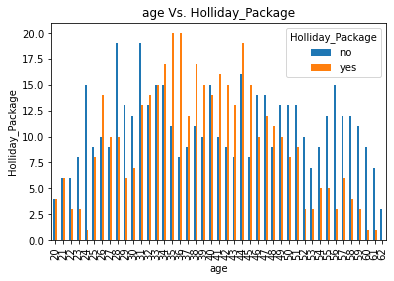

In [28]:
pd.crosstab(data_df.age,data_df.Holliday_Package).plot(kind='bar')
plt.title('age Vs. Holliday_Package')
plt.xlabel('age')
plt.ylabel('Holliday_Package')

Text(0, 0.5, 'Holliday_Package')

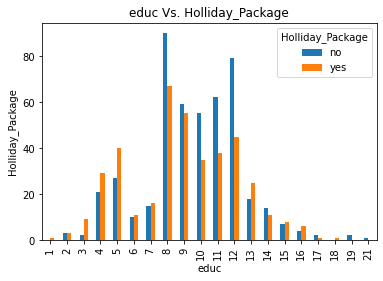

In [29]:
pd.crosstab(data_df.educ,data_df.Holliday_Package).plot(kind='bar')
plt.title('educ Vs. Holliday_Package')
plt.xlabel('educ')
plt.ylabel('Holliday_Package')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019881426940>]],
      dtype=object)

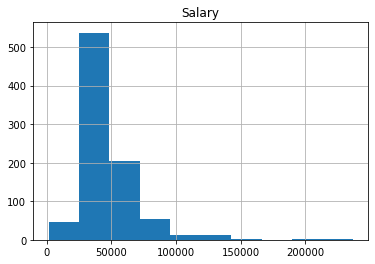

In [34]:
data_df.hist(column='Salary')

Text(0, 0.5, 'Holliday_Package')

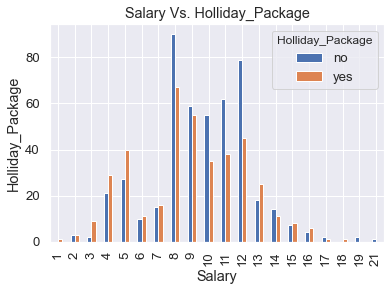

In [328]:
pd.crosstab(data_df.educ,data_df.Holliday_Package).plot(kind='bar')
plt.title('Salary Vs. Holliday_Package')
plt.xlabel('Salary')
plt.ylabel('Holliday_Package')

In [330]:
import plotly.express as px

# How many games in each category?
temp_grp_df = data_df.groupby('Holliday_Package').count().reset_index(drop=False)

fig = px.bar(temp_grp_df, y='Holliday_Package', x='Salary', orientation='h')
fig.show()

ModuleNotFoundError: No module named 'plotly'

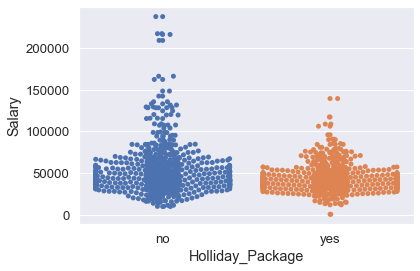

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.swarmplot(x="Holliday_Package", y="Salary", data=data_df)



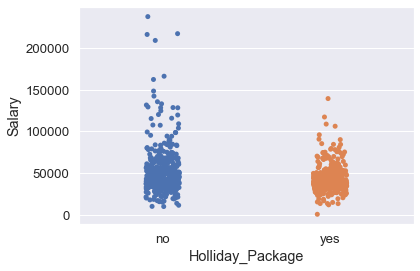

In [333]:
sns.stripplot(x="Holliday_Package", y="Salary", data=data_df)

Shape before Outliers Treatment (872, 7)


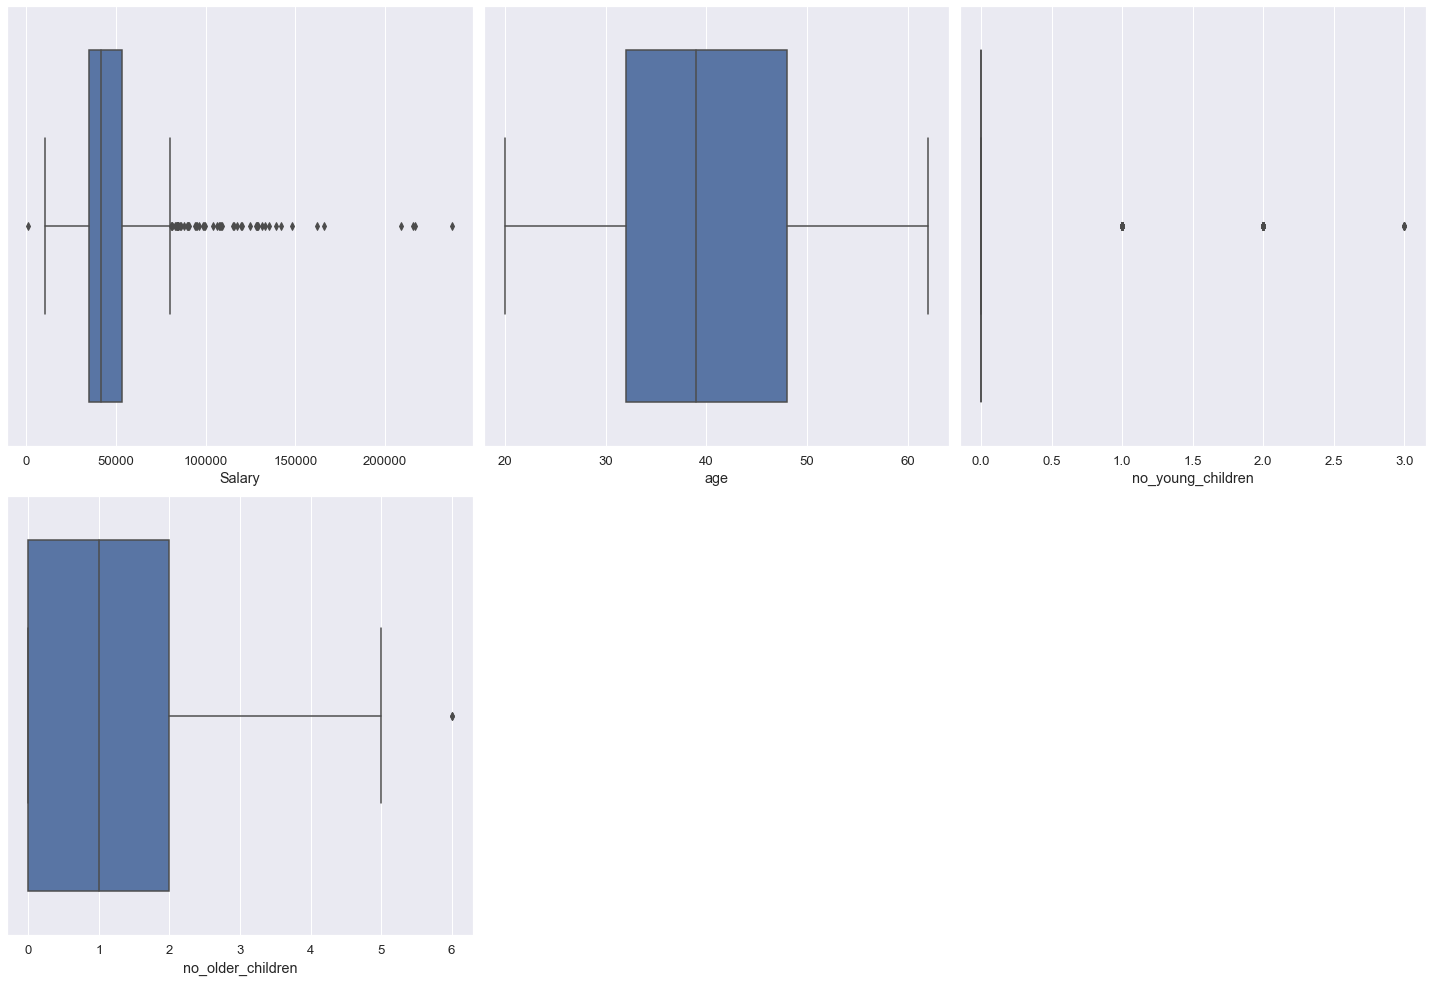

In [67]:
data_plot=data_df[['Salary', 'age', 'no_young_children', 'no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',data_df.shape)



**Checking the outliers and treating the outliers**

In [289]:
Q1 = data_df.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = data_df.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [290]:
lower_range

Salary               8105.75
age                     8.00
educ                    2.00
no_young_children       0.00
no_older_children      -3.00
dtype: float64

In [291]:
upper_range

Salary               80687.75
age                     72.00
educ                    18.00
no_young_children        0.00
no_older_children        5.00
dtype: float64

In [292]:
data_df['Salary']=np.where(data_df['Salary']> 80687.75,80687.75,data_df['Salary'])
data_df['Salary']=np.where(data_df['Salary']< 8105.75,8105.75,data_df['Salary'])



Shape after Outliers Treatment (872, 7)


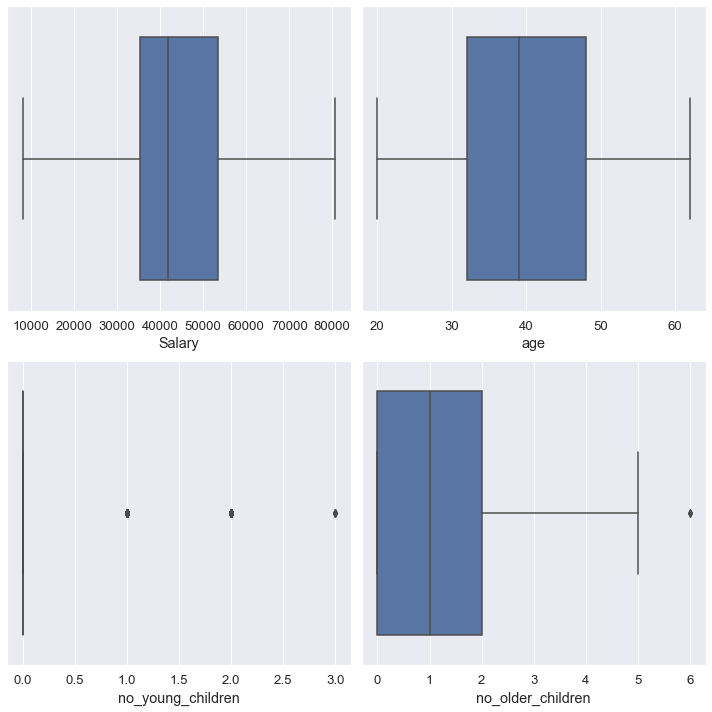

In [293]:
data_plot=data_df[['Salary', 'age', 'no_young_children', 'no_older_children']]
fig=plt.figure(figsize=(10,10))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',data_df.shape)



C:\Users\RemotePC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


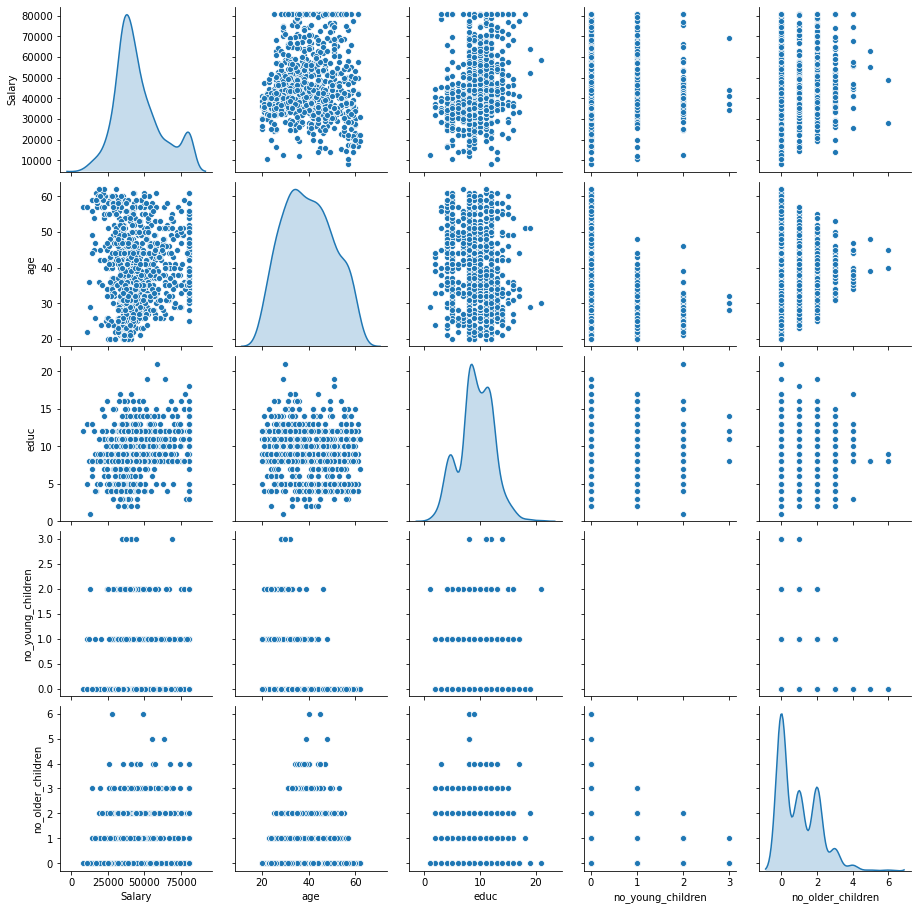

In [275]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

data_df_attr = data_df.iloc[:, 0:10]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(data_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the defaul

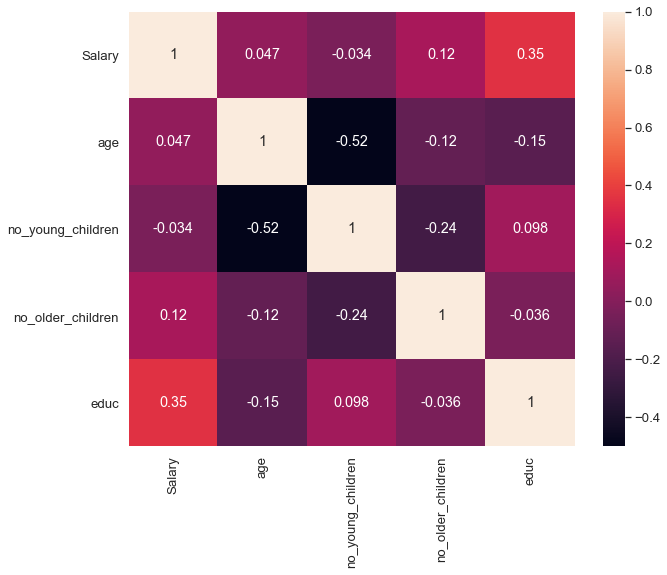

In [294]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(data_df[['Salary', 'age', 'no_young_children', 'no_older_children','educ']].corr(), annot=True,vmin=-0.5,vmax=1)

**no_young_children is negatively correlated with age
Education is positive correlated with Salary**

**Convert Object Feature types for Linear Discriminant Analysis**

In [79]:
data_df['Holliday_Package'].value_counts()


no     471
yes    401
Name: Holliday_Package, dtype: int64

In [78]:
data_df['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [308]:
data_df['Holliday_Package']=np.where(data_df['Holliday_Package'] =='yes', '1', data_df['Holliday_Package']).astype('int')
data_df['Holliday_Package']=np.where(data_df['Holliday_Package'] =='no', '0', data_df['Holliday_Package']).astype('int')

In [312]:
data_df['foreign']=np.where(data_df['foreign'] =='yes', '1', data_df['foreign']).astype('int')
data_df['foreign']=np.where(data_df['foreign'] =='no', '0', data_df['foreign']).astype('int')

In [313]:
# Copy all the predictor variables into X dataframe. Since 'holiday package' is dependent variable drop it
X = data_df.drop('Holliday_Package', axis=1)


# Copy the 'holiday package' column alone into the y dataframe. This is the dependent variable
y = data_df[['Holliday_Package']]


In [314]:
# Split X and y into training and test set in 75:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30 , random_state=100)

In [315]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [316]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearDiscriminantAnalysis()
lmodel = regression_model.fit(X_train, Y_train)

C:\Users\RemotePC\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [317]:
# Training Data Class Prediction 
pred_class_train = lmodel.predict(X_train)

# Test Data Class Prediction 
pred_class_test = lmodel.predict(X_test)

In [318]:
print(classification_report(Y_train,pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       332
           1       0.66      0.55      0.60       278

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [223]:
print(classification_report(Y_test,pred_class_test))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       139
           1       0.70      0.53      0.60       123

    accuracy                           0.67       262
   macro avg       0.68      0.66      0.66       262
weighted avg       0.68      0.67      0.66       262



In [319]:
# Training Data Probability Prediction
pred_prob_train = lmodel.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = lmodel.predict_proba(X_test)

AUC for the Training Data: 0.720


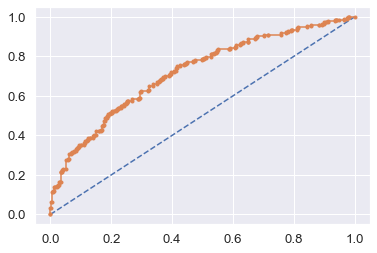

In [322]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')




AUC for the Test Data: 0.742


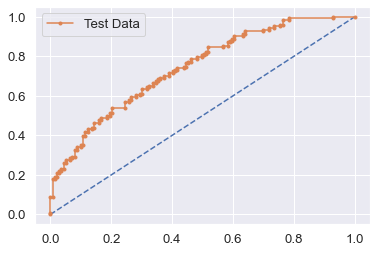

In [321]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [244]:
lmodel.score(X_train, Y_train)

0.6672131147540984

In [227]:
# Accuracy - Test Data
lmodel.score(X_test, Y_test)

0.6717557251908397

**Logistic Regression**

In [245]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int32  
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 41.0 KB


In [246]:
data_df1 = data_df.copy()
data_df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [247]:
# Copy all the predictor variables into X dataframe
Xl = data_df1.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
yl = data_df1['Holliday_Package']

In [248]:
# Split X and y into training and test set in 70:30 ratio
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size=0.30 , random_state=100)

In [249]:
# Fit the Logistic Regression model
LRmodel = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LRmodel.fit(Xl_train, yl_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [250]:
ytrainl_predict = LRmodel.predict(Xl_train)
ytestl_predict = LRmodel.predict(Xl_test)

In [251]:
# Accuracy - Training Data
LRmodel.score(Xl_train, yl_train)

0.6655737704918033

AUC: 0.721


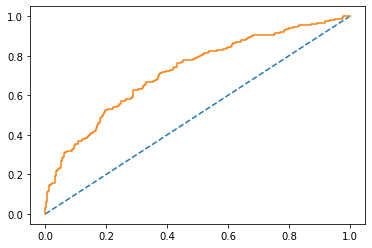

In [252]:
# predict probabilities
probsl = LRmodel.predict_proba(Xl_train)
# keep probabilities for the positive outcome only
probsl = probsl[:, 1]
# calculate AUC
auclo = roc_auc_score(yl_train, probsl)
print('AUC: %.3f' % auclo)
# calculate roc curve
train_fprl, train_tprl, train_thresholdsl = roc_curve(yl_train, probsl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fprl, train_tprl);

In [256]:
# Accuracy - Test Data
LRmodel.score(Xl_test, yl_test)

0.6717557251908397

AUC: 0.743


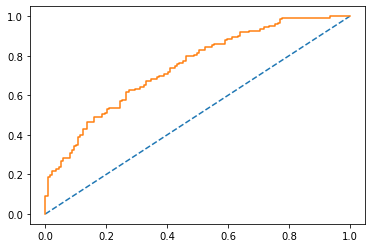

In [257]:
# predict probabilities
probsl = LRmodel.predict_proba(Xl_test)
# keep probabilities for the positive outcome only
probsl = probsl[:, 1]
# calculate AUC
test_auclo = roc_auc_score(yl_test, probsl)
print('AUC: %.3f' % test_auclo)
# calculate roc curve
test_fprl, test_tprl, test_thresholdsl = roc_curve(yl_test, probsl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fprl, test_tprl);

In [258]:
print(classification_report(yl_train, ytrainl_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       332
           1       0.66      0.54      0.60       278

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [259]:
print(classification_report(yl_test, ytestl_predict))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       139
           1       0.69      0.54      0.61       123

    accuracy                           0.67       262
   macro avg       0.68      0.66      0.66       262
weighted avg       0.68      0.67      0.67       262

